In [28]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import files
%matplotlib inline

In [29]:
# Loading data
df_stroke = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
# Drop ID column
df_stroke.drop(columns=['id'], inplace=True)
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
# Check for NaN Values

df_stroke.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [32]:
# Drop NaN Values

df_stroke.dropna(inplace=True)
df_stroke.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [33]:
# Get Dummies to transfrom column with encoding function

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
existing_categorical_cols = [col for col in categorical_cols if col in df_stroke.columns]

df_stroke = pd.get_dummies(df_stroke, columns=existing_categorical_cols, drop_first=True)

df_stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False


In [34]:
# Display all column names
df_stroke.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [35]:
# Get Dummies to transfrom column with encoding function

#df_stroke = pd.get_dummies(df_stroke, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
#df_stroke.head()

In [36]:
# Drop gender_Other column

df_stroke.drop(columns=['gender_Other'], inplace=True)
df_stroke.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,True,False,True,False,False,True,True,False,False


In [37]:
# Define features set
X = df_stroke.copy()
X.drop("stroke", axis=1, inplace=True)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,True,True,False,True,False,False,True,True,False,False


In [38]:
# Define target vector
y = df_stroke["stroke"]
y[:5]


,stroke
0,1
2,1
3,1
4,1
5,1


In [39]:
# Splitting into training tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)


In [40]:
# Creating standard scalar instance
scaler = StandardScaler()

In [41]:
# Fitting standard scalar
X_scaler = scaler.fit(X_train)


In [42]:
# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Apply SMOTEEN to balance data

In [43]:
from imblearn.combine import SMOTEENN
from collections import Counter


# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=78)
X_resampled, y_resampled = smoteenn.fit_resample(X_train_scaled, y_train)

# Check the class distribution after resampling
print(f"Class distribution before resampling: {Counter(y_train)}")
print(f"Class distribution after resampling: {Counter(y_resampled)}")

Class distribution before resampling: Counter({0: 3299, 1: 137})
Class distribution after resampling: Counter({1: 3132, 0: 2760})


## Fitting and Predicting the Random Forest Model


In [44]:
# Creating Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_resampled, y_resampled)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([0, 1, 0, ..., 0, 0, 0])

## Model Evaluation

In [45]:
# Calculating the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1283,118
Actual 1,50,22


Accuracy Score : 0.8859470468431772
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1401
           1       0.16      0.31      0.21        72

    accuracy                           0.89      1473
   macro avg       0.56      0.61      0.57      1473
weighted avg       0.92      0.89      0.90      1473



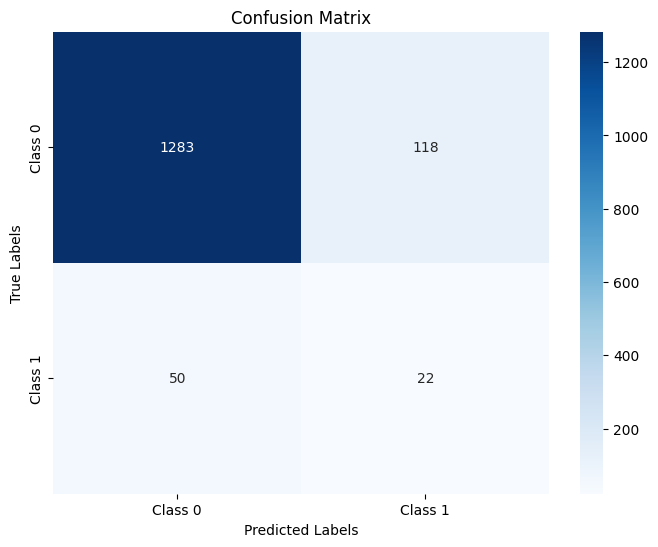

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
# Display Results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
report = classification_report(y_test, predictions)
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the confusion matrix plot as an image
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

# Download the confusion matrix image
files.download('confusion_matrix.png')

# Save the classification report as a text file
with open('classification_report.txt', 'w') as f:
    f.write(report)  # Write the classification report string

# Download the classification report file
files.download('classification_report.txt')

## Feature Importance

In [47]:
# Random Forest in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3350959299127071, 'age'),
 (0.1348437838336809, 'avg_glucose_level'),
 (0.09681474173801209, 'ever_married_Yes'),
 (0.08549856257032039, 'bmi'),
 (0.058965027307559176, 'Residence_type_Urban'),
 (0.057834627735190394, 'hypertension'),
 (0.0447577307026906, 'gender_Male'),
 (0.038144946894433686, 'smoking_status_never smoked'),
 (0.03776339512275638, 'work_type_Private'),
 (0.029373397600758914, 'smoking_status_formerly smoked'),
 (0.022838550516734883, 'heart_disease'),
 (0.020331736752286125, 'work_type_children'),
 (0.019388645995065977, 'work_type_Self-employed'),
 (0.018336222143094855, 'smoking_status_smokes'),
 (1.270117470849507e-05, 'work_type_Never_worked')]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

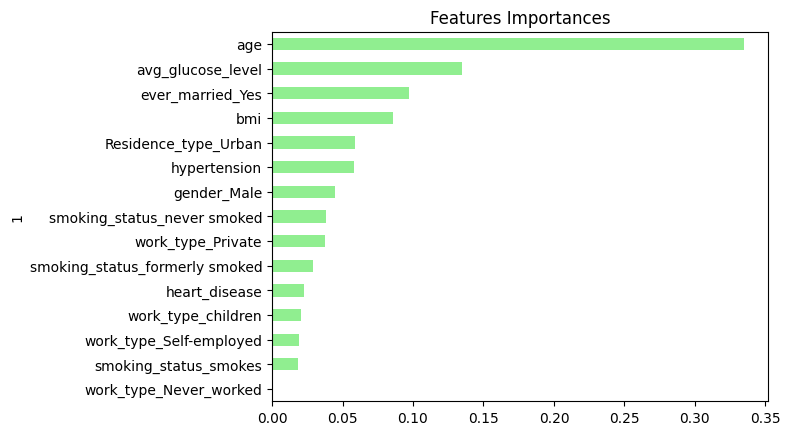

In [48]:
# Visualize the features by importance
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')#.tail(10)
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Save the plot as an image
plt.savefig('feature_importances_plot.png', bbox_inches='tight')

# Download image
files.download('feature_importances_plot.png')

## Verify Correlation of Features

In [49]:

import numpy as np


# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs of features with high correlation (>0.8 or <-0.8)
high_corr_pairs = [
    (column, row, upper_triangle.loc[row, column])
    for column in upper_triangle.columns
    for row in upper_triangle.index
    if abs(upper_triangle.loc[row, column]) > 0.5
]

# Print the highly correlated feature pairs
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} and {feature2} have correlation: {corr_value}")


ever_married_Yes and age have correlation: 0.6736293291495401
work_type_Self-employed and work_type_Private have correlation: -0.5125631658070328
work_type_children and age have correlation: -0.6276968731848792
work_type_children and ever_married_Yes have correlation: -0.5404546646651103


## Remove Low-Importance Features and Re-run Model


In [50]:
# Remove Low-Importance Features
low_importance_features = ['work_type_Never_worked', 'work_type_Private', 'work_type_children', 'work_type_Self-employed']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)


# Apply SMOTEENN
smoteenn = SMOTEENN(random_state=78)
X_resampled_mod, y_resampled_mod = smoteenn.fit_resample(X_train_reduced, y_train)

# Check the class distribution after resampling
print(f"Class distribution before resampling: {Counter(y_train)}")
print(f"Class distribution after resampling: {Counter(y_resampled_mod)}")

# Train and Evaluate Model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled_mod, y_resampled_mod)
y_pred = model.predict(X_test_reduced)

# Run Classification Report

report = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Save the report as a text file
with open('classification_report_modified.txt', 'w') as f:
    f.write(report)

# Download the file

files.download('classification_report_modified.txt')

Class distribution before resampling: Counter({0: 3299, 1: 137})
Class distribution after resampling: Counter({1: 3041, 0: 2524})
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1401
           1       0.17      0.42      0.24        72

    accuracy                           0.87      1473
   macro avg       0.57      0.66      0.59      1473
weighted avg       0.93      0.87      0.90      1473



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

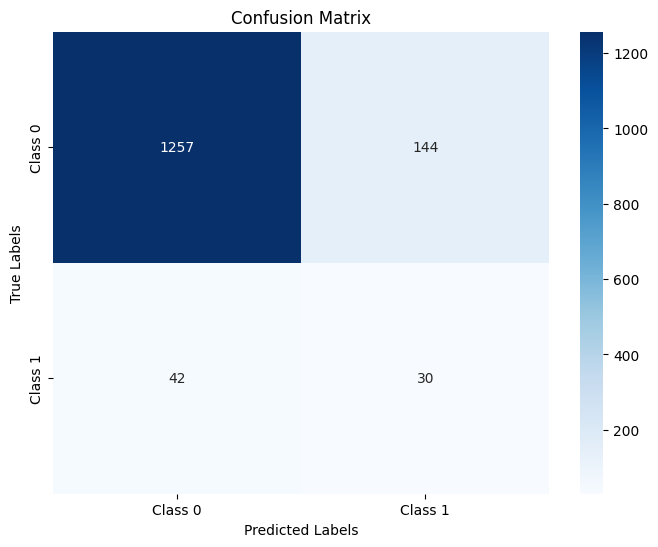

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the confusion matrix plot as an image
plt.savefig('confusion_matrix_modified.png', bbox_inches='tight')
plt.show()

# Download the image

files.download('confusion_matrix_modified.png')